In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import the data covert that into a convenient data
PATH= '/home/ac-optimus/data_science/recommendation_sys/ratings_small.csv'
df = pd.read_csv(PATH, sep= ",")
# df = pd.read_csv(PATH, sep= ",")
df.shape

(100004, 4)

In [3]:
df.drop('timestamp', axis=1, inplace=True)
df.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [4]:
# this gave me a good plot
from sklearn.utils import shuffle
df = shuffle(df)

In [5]:
df.head()

,userId,movieId,rating
64792,462,1372,3.0
77725,537,1230,4.0
52928,384,5377,2.5
74544,518,2160,3.0
44630,312,3623,1.0


In [6]:
num_rows = df.shape[0]
train, test = df.copy(deep = True), df[int(num_rows*0.8):].copy(deep = True)
train[int(num_rows*0.8):]['rating']  = train[int(num_rows*0.8):]['rating']*0
train = shuffle(train)

<ipython-input-6-75ff325d5135>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[int(num_rows*0.8):]['rating']  = train[int(num_rows*0.8):]['rating']*0


In [7]:
user_movie_rating =train.groupby(['userId','movieId'])['rating'].max().unstack().fillna(0)
user_movie_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
user_movie_rating.shape
print ("We have {} users in our user-movie matrix.".format(user_movie_rating.shape[0]))
print ("We have {} movies in our user-movie matrix.".format(user_movie_rating.shape[1]))


We have 671 users in our user-movie matrix.
We have 9066 movies in our user-movie matrix.


In [9]:
correlation_matrix = user_movie_rating.corr()
correlation_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.178870,0.153120,0.066895,0.032584,0.159756,0.111930,0.054634,-0.020927,0.079599,...,-0.024107,0.017718,0.080454,0.080454,0.080454,0.080454,0.080454,-0.024107,-0.024107,-0.024107
2,0.178870,1.000000,0.123386,0.115561,0.112162,0.097374,0.051427,0.191494,0.083782,0.195594,...,-0.013649,0.053570,0.070375,0.087180,0.087180,0.154399,0.070375,-0.013649,-0.013649,-0.013649
3,0.153120,0.123386,1.000000,0.122150,0.253318,0.152240,0.342653,0.153424,0.092826,0.077363,...,-0.010212,-0.010212,-0.010212,0.120721,0.120721,-0.010212,-0.010212,-0.010212,-0.010212,-0.010212
4,0.066895,0.115561,0.122150,1.000000,0.132011,0.026312,0.097005,0.177337,0.132770,0.053945,...,-0.004651,-0.004651,-0.004651,-0.004651,-0.004651,-0.004651,-0.004651,-0.004651,-0.004651,-0.004651
5,0.032584,0.112162,0.253318,0.132011,1.000000,0.160937,0.323919,0.103099,0.256708,0.077143,...,-0.009655,-0.009655,-0.009655,-0.009655,-0.009655,-0.009655,-0.009655,-0.009655,-0.009655,-0.009655


In [10]:
# person similarity based

# when we want to find a recommendaiton for a user.
# we compute the correlation(cetered cosine or person correlation, making a saperate column would be a good idea)
# with all the users in the utility matrix
# return the top movies that user had not watched yet and recommend that movie
# main aim is to fill the values that is it.
# central_mean.iloc[0].corr(central_mean.iloc[1])
# user_movie_rating= central_mean

In [13]:
def error(y_hat, y):
    # MSE
    y_hat = np.array(y_hat)
    y = np.array(y)
    MSE_ = (y_hat- y)**2
    MSE = MSE_.sum()/len(y_hat)
    return MSE

### Similarity based

In [14]:
def PredictMovieRating(user_i, movie_i, corr_mat, user_movie_rating, k):
    # for user x
    # rxi = sum over knn (sxy*ryi)/sum over all the knn similarities
    all_neighbours = corr_mat.loc[movie_i]
    all_neighbours = all_neighbours.drop(movie_i)
    topk_neighbours = all_neighbours.sort_values(ascending=False)[:k]  # knn
    # knn user ids
    knn = topk_neighbours.index.tolist()
#     return knn
    sum_sim = sum([corr_mat[movie_i][movie_j] for movie_j in knn])
    weighted_sum_sim = sum([corr_mat[movie_i][movie_j]
                            *user_movie_rating[movie_j][user_i] 
                           for movie_j in knn])
    predicted_rating = weighted_sum_sim/sum_sim
    return predicted_rating

In [14]:
# Similarity based
# we have to keep  a correlation matrix. we can say that we update this on regular intervals
# use the prediction formulae given in the video
# here we need k nearest neighbours based on whome we can make a prediction
# how do we decide k?
# def PredictMovieRating(user_i, movie_i, corr_mat, user_movie_rating):
#     # for user x
#     # rxi = sum over knn (sxy*ryi)/sum over all the knn similarities
#     all_neighbours = corr_mat.iloc[user_i]
#     all_neighbours.drop(user_i)
#     topk_neighbours = all_neighbours.sort()[:k]  # knn
#     # knn user ids
#     knn = topk_neighbours.index.tolist()
    
#     sum_sim = sum([corr_mat[user_i][user_j] for user_j in knn])
#     weighted_sum_sim = sum([corr_mat[user_i][user_j]*user_movie_rating[user_j][movie_i] 
#                            for user_j in knn])
#     predicted_rating = weighted_sum_sim/sum_sim
#     return predicted_rating
    
def Prediction(user_i, intial_mat, user_movie_rating, corr_mat):
    # return a list of movieIds as prediction
    # we wont populate user_movie_rating here, let the user do that after he has watched the movie
    predicted_ratings = []  # a heap
    movieIds = intial_mat.columns()
    for movieId in movieIds:
        if intial_mat[user_i][movieId] == 'Null': # check if null value
            # time to predict rating for this movie
            rating = PredictMovieRating(user_i, movieId, corr_mat, user_movie_rating)
            predicted_ratings.append((rating, movieId))
    predicted_ratings.sort(key= lambda x:x[0])
    movie_predictions = [x[1] for x in predicted_ratings]
    return movie_predictions


In [15]:
# to compute error
# create a new matrix that has ratings based on similarities 
# compare with the y and yhat and get the error
# we can use the same split of test and train as in assignment.

# obtain the optimal k

In [15]:
%%time
# looking for optimal k
y= test['rating']
errors = {}
for k in range(1, 20):
    y_hat = []
    for i in test.index:
        user_i, movie_j = map(int,[test.loc[i]['userId'], 
                                   test.loc[i]['movieId']])
        # make the prediction here
        predicted_rating = PredictMovieRating(user_i, 
                                              movie_j, 
                                              correlation_matrix, 
                                              user_movie_rating, k)
        y_hat.append(predicted_rating)
    error_i = error(np.nan_to_num(np.array(y_hat)), y)        
    errors[k]=error_i


CPU times: user 18min 57s, sys: 452 ms, total: 18min 57s
Wall time: 19min


Text(0.5, 1.0, 'optimal neighbour search')

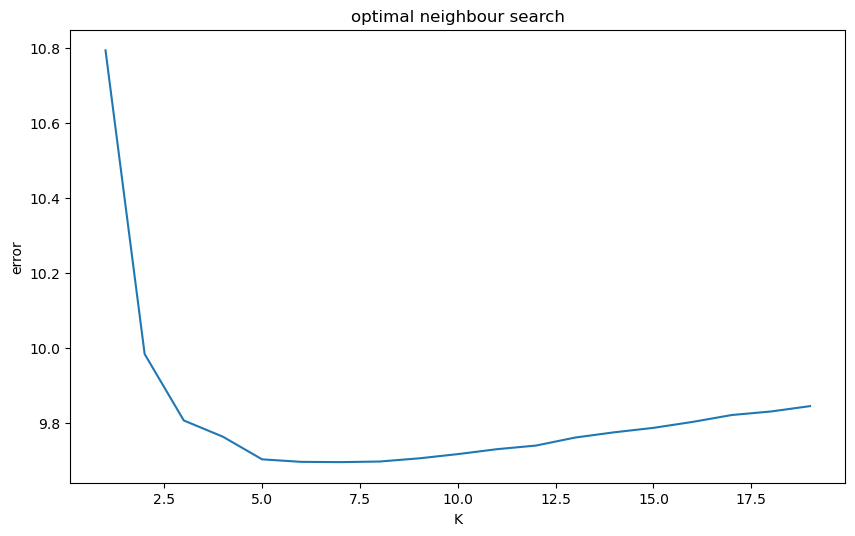

In [17]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(errors.keys(), errors.values())
plt.xlabel('K')
plt.ylabel('error')
plt.title('optimal neighbour search')

# Evaluation

### optimial k =6

In [18]:
%%time
# looking for optimal k
y= test['rating']
errors = {}
y_hat = []
for i in test.index:
    user_i, movie_j = map(int,[test.loc[i]['userId'], 
                               test.loc[i]['movieId']])
    # make the prediction here
    predicted_rating = PredictMovieRating(user_i, 
                                          movie_j, 
                                          correlation_matrix, 
                                          user_movie_rating, 6)
    y_hat.append(predicted_rating)
error_i = error(np.nan_to_num(np.array(y_hat)), y)        


CPU times: user 50.2 s, sys: 12 ms, total: 50.2 s
Wall time: 50.2 s


In [36]:
y= test['rating'].tolist()
# compute error
error(np.nan_to_num(np.array(y_hat)), y)

9.696853709119665

In [37]:
test['prediction'] = y_hat
test.head()

,userId,movieId,rating,prediction
2272,15,61323,1.0,0.00000
45764,328,1136,3.0,0.00000
68705,475,90866,3.5,0.00000
72264,508,380,4.0,2.48949
95276,625,1873,3.5,0.00000


In [122]:
one_user= test.loc[(test['userId'] == 19)].sort_values('rating', 
                      inplace=False, 
                      ascending=False)
one_user.head()

,userId,movieId,rating,prediction
3183,19,262,5.0,0.000000
3337,19,916,5.0,1.500588
3452,19,1260,5.0,0.000000
3420,19,1213,5.0,3.194447
3115,19,16,5.0,0.505388


### Recall and Precision

In [123]:
relevance_threshold = 2
recommended_movies = set(one_user.loc[(one_user['prediction'] >= relevance_threshold)]['movieId'].tolist())
relavent_movies = set(one_user.loc[(one_user['rating'] >= relevance_threshold)]['movieId'].tolist())
len(relavent_movies), len(recommended_movies)

(74, 16)

In [124]:
recommended_movies_intersection_relavant_movies = [i for i in recommended_movies if i in relavent_movies]
recommended_movies_intersection_relavant_movies;

In [125]:
recall = len(recommended_movies_intersection_relavant_movies)/len(relavent_movies)
precision = len(recommended_movies_intersection_relavant_movies)/len(recommended_movies)

In [126]:
len(recommended_movies), len(recommended_movies_intersection_relavant_movies), len(relavent_movies)

(16, 16, 74)

In [127]:
precision, recall

(1.0, 0.21621621621621623)

In [128]:
f_score = 2*precision*recall/(precision+recall)
f_score

0.35555555555555557

### Recall@k and Precision@k

In [136]:
k=18
top_k_predictions_df = one_user.sort_values('prediction', ascending=False)[:k]
top_k_predictions_df.head()

,userId,movieId,rating,prediction
3341,19,924,4.0,4.330468
3290,19,589,3.0,3.496374
3466,19,1276,4.0,3.345124
3420,19,1213,5.0,3.194447
3198,19,318,4.0,3.144046


In [137]:
relevance_threshold=2
top_k_movies_recommended = set(top_k_predictions_df.loc[(top_k_predictions_df['prediction'] >= relevance_threshold)]['movieId'].tolist())
top_k_movies_relevant = set(top_k_predictions_df.loc[(top_k_predictions_df['rating'] >= relevance_threshold)]['movieId'].tolist())
# top_k_predictions_df['rating']

In [138]:
recommended_movies_intersection_relavant_movies = [i for i in top_k_movies_recommended
                                                   if i in top_k_movies_relevant]
recommended_movies_intersection_relavant_movies;

In [139]:
len(top_k_movies_recommended), len(recommended_movies_intersection_relavant_movies), len(top_k_movies_relevant)

(16, 16, 18)

In [143]:
if len(top_k_movies_relevant)!=0:
    recall = len(recommended_movies_intersection_relavant_movies)/len(top_k_movies_relevant)
else:
    recall = 1
if len(top_k_movies_recommended)!=0:
    precision = len(recommended_movies_intersection_relavant_movies)/len(top_k_movies_recommended)
else:
    precision = 1

In [144]:
precision, recall

(1.0, 0.8888888888888888)

In [145]:
f_score = 2*precision*recall/(precision+recall)
f_score

0.9411764705882353